In [129]:
# Observed Trend 1: Urban cities have the highest number of rides per city and the lowest averages fares while rural cities have the opposite.
# Observed Trend 2: The total drivers per city seems to be uniform across the different types of cities
# Observed Trend 3: Urban cities have the highest percentage of fares, rides, and drives across the city types


In [130]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [131]:
# Import ride data into pandas from CSV

ride_data_df = pd.read_csv("ride_data.csv")
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [132]:
# Import city data into pandas from CSV

city_data_df = pd.read_csv("city_data.csv")
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [133]:
merged_df = pd.merge(ride_data_df, city_data_df, on="city")
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [134]:
tot_drivers_city = city_data_df["driver_count"]
tot_drivers_city.head()

0    63
1     8
2    12
3    34
4    52
Name: driver_count, dtype: int64

In [135]:
city_group = merged_df.groupby(['type','city'])
tot_rides_city = city_group['ride_id'].count()

urban_count  = tot_rides_city.loc["Urban"]

rural_count  = tot_rides_city.loc["Rural"]

sub_count  = tot_rides_city.loc["Suburban"]
sub_count.head()

city
Anitamouth       9
Campbellport    15
Carrollbury     10
Clarkstad       12
Conwaymouth     11
Name: ride_id, dtype: int64

In [136]:

avg_fare = city_group['fare'].mean()

urban_avg = avg_fare.loc["Urban"]

rural_avg = avg_fare.loc["Rural"]

sub_avg = avg_fare.loc["Suburban"]
sub_avg.head()

city
Anitamouth      37.315556
Campbellport    33.711333
Carrollbury     36.606000
Clarkstad       31.051667
Conwaymouth     34.591818
Name: fare, dtype: float64

Text(0.93,0.475,'Circle size correlates with driver count per city')

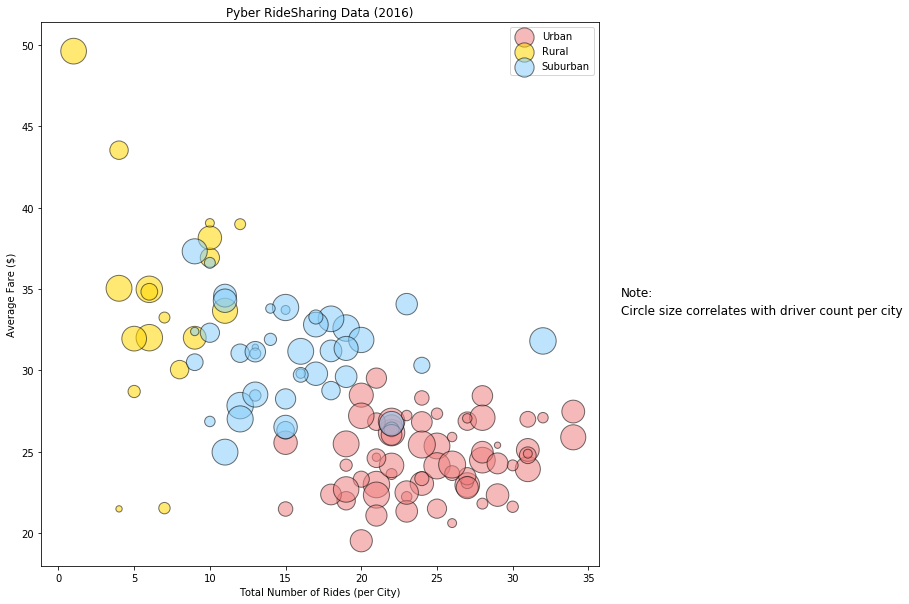

In [137]:
import seaborn as sns

plt.figure(figsize = (10, 10))

plt.title("Pyber RideSharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

plt.scatter(urban_count, urban_avg, marker="o", facecolors="lightcoral", edgecolors="black", s=10*tot_drivers_city, alpha=0.55, label = "Urban")
plt.scatter(rural_count, rural_avg, marker="o", facecolors="gold", edgecolors="black", s=10*tot_drivers_city, alpha=0.55, label = "Rural")
plt.scatter(sub_count, sub_avg, marker="o", facecolors="lightskyblue", edgecolors="black", s=10*tot_drivers_city, alpha=0.55, label = "Suburban")
plt.legend(loc="best")
plt.text(.93, 0.5, "Note:", fontsize=12, transform=plt.gcf().transFigure)
plt.text(.93, 0.475, "Circle size correlates with driver count per city", fontsize=12, transform=plt.gcf().transFigure)

In [138]:
citygrp = city_data_df.groupby('type')

tot_drivers = citygrp['driver_count'].sum()

tot_drivers

type
Rural        104
Suburban     635
Urban       2607
Name: driver_count, dtype: int64

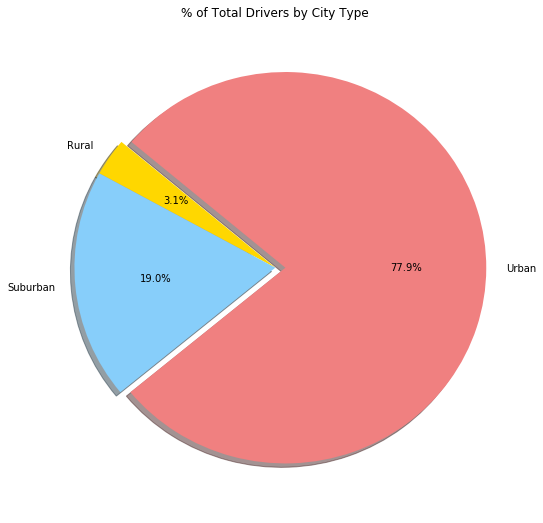

In [139]:
explode =(0,0,0.05)
colors = ['gold', 'lightskyblue', 'lightcoral',]
types = ['Rural', 'Suburban', 'Urban']

plt.figure(figsize = (9, 9))

plt.pie(tot_drivers, explode = explode, colors=colors, labels=types, autopct="%1.1f%%", shadow=True, startangle = 140)

plt.title("% of Total Drivers by City Type")

plt.show()

In [140]:
type_merged = merged_df.groupby('type')

tot_fare = type_merged['fare'].sum()

tot_fare

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: fare, dtype: float64

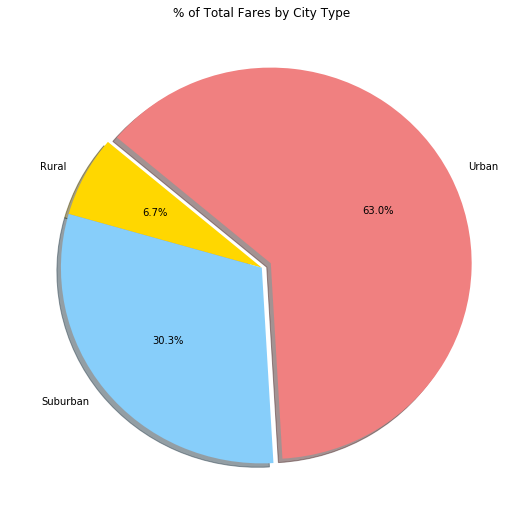

In [141]:
plt.figure(figsize = (9, 9))

plt.pie(tot_fare, explode = explode, colors=colors, labels=types,  autopct="%1.1f%%", shadow=True, startangle = 140)

plt.title("% of Total Fares by City Type")

plt.show()

In [142]:
tot_rides = type_merged['ride_id'].count()

tot_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

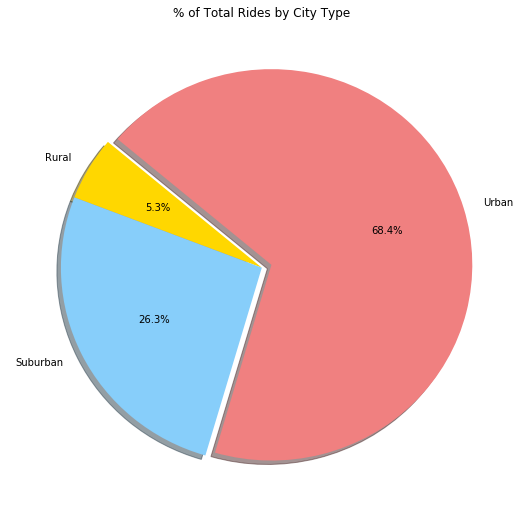

In [143]:
plt.figure(figsize = (9, 9))

plt.pie(tot_rides, explode = explode, colors=colors, labels=types, autopct="%1.1f%%", shadow=True, startangle = 140)

plt.title("% of Total Rides by City Type")

plt.show()